# Solutions to 
# Tutorial "Algorithmic Methods for Network Analysis with NetworKit" (Part 4)

## Determining Important Nodes (cont'd)
### Betweenness Centrality
If you interpret the Facebook graph as web link graph in the previous Q&A session, the obvious ranking choice is the PageRank. Note that today it is only one of many aspects modern web search engines consider to rank web pages. However, we were looking for the eigenvector centrality as MIT8 is a social network (both and possibly others can be applicable, though).

In applications where the flow of goods, vehicles, information, etc. via shortest paths in a network plays a major role, *betweenness centrality* is an interesting centrality index. It is also widely used for social networks. Its drawback is its rather high running time, which makes its use problematic for really large networks. But in many applications we do not need to consider the exact betweenness values nor an exact ranking. An *approximation* is often good enough.

### Q&A Session #7

1. In the *PGP network*, compute the 15 nodes with the highest (exact) betweenness values and order them accordingly in a ranking.
**Answer:**

2. Perform the same as in 1) with one difference: Instead of using the algorithm for computing exact betweenness values, use the RK approximation algorithm. Use also values different from the default ones for the parameters $\delta$ and $\epsilon$. What effects do you see in comparison to the ranking based on exact values? What about running time (you can use %time preceding a call to get its CPU time)? And how do the parameter settings affect these effects?
**Answer:**

In [1]:
from networkit import *

In [2]:
%matplotlib inline

In [3]:
cd ~/Documents/workspace/NetworKit-github/

/Users/Henning/Documents/workspace/NetworKit-github


In [4]:
G = readGraph("input/PGPgiantcompo.graph", Format.METIS)

# Code for 7-1)
# exact computation
bc = centrality.Betweenness(G, True)
%time bc.run()
bc.ranking()[:15]

CPU times: user 1min 21s, sys: 16.7 s, total: 1min 38s
Wall time: 28.3 s


[(1143, 0.2623789744305218),
 (6555, 0.1954496113137382),
 (6655, 0.1913008469749773),
 (7297, 0.17917467109450583),
 (6932, 0.15985847735832273),
 (6744, 0.1395387898369537),
 (3156, 0.13230056456746048),
 (6098, 0.1284348766026611),
 (2258, 0.1127583315644245),
 (5165, 0.09844150000735757),
 (604, 0.09092922779198578),
 (7324, 0.0891987976588468),
 (7369, 0.08773781843437384),
 (4466, 0.08541569684378708),
 (5848, 0.07628984596892677)]

In [5]:
# Code for 7-2)
# approximate computation
bca = centrality.ApproxBetweenness(G, 0.05)
%time bca.run()
bca.ranking()[:15]

CPU times: user 10.3 s, sys: 1.58 s, total: 11.9 s
Wall time: 3.51 s


[(1143, 0.13365442504515337),
 (6555, 0.1020469596628536),
 (6655, 0.09993979530403362),
 (6932, 0.09060806742925943),
 (7297, 0.08579169175195661),
 (3156, 0.07104154124021676),
 (6744, 0.06953642384105964),
 (2258, 0.06622516556291394),
 (6098, 0.06592414208308252),
 (5165, 0.04455147501505122),
 (7324, 0.04364840457555694),
 (7369, 0.04244431065623123),
 (604, 0.0421432871763998),
 (4466, 0.03853100541842267),
 (6639, 0.03521974714027697)]

## Community Detection
This section demonstrates the community detection capabilities of NetworKit. Community detection is concerned with identifying groups of nodes which are significantly more densely connected to each other than to the rest of the network.

Code for community detection is contained in the `community` module. The module provides a top-level function to quickly perform community detection with a suitable algorithm and print some stats about the result.

In [6]:
community.detectCommunities(G)

PLM(balanced,pc,turbo) detected communities in 0.02428412437438965 [s]
solution properties:
-------------------  ----------
# communities        105
min community size     4
max community size   688
avg. community size  101.714
modularity             0.882493
-------------------  ----------


The default setting uses the parallel Louvain method (PLM) as underlying algorithm. The function prints some statistics and returns the partition object representing the communities in the network as an assignment of node to community label. PLM yields a high-quality solution at reasonably fast running times. Let us now apply other algorithms. To this end, one specifies the algorithm directly in the call.

In [7]:
community.detectCommunities(G, algo=community.PLP(G))

PLP detected communities in 0.012447834014892578 [s]
solution properties:
-------------------  ----------
# communities        979
min community size     2
max community size   571
avg. community size   10.9091
modularity             0.800326
-------------------  ----------


The visualization module, which is based on external code for graph drawing, provides a function which visualizes the community graph for a community detection solution: Communities are contracted into single nodes whose size corresponds to the community size. For problems with hundreds or thousands of communities, this may take a while.

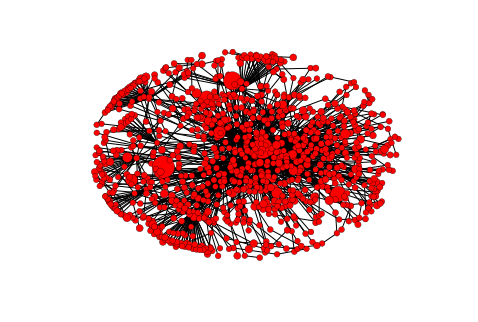

In [8]:
communities = _
viztasks.drawCommunityGraph(G, communities)

### Q&A Session 8

1. Run PLMR as well. What are the main differences between the three algorithms PLM, PLMR, and PLP in terms of the solutions they compute and the time they need for this computation?
**Answer:**

2. Visualize the three results. Can you see aspects of your answer to 1) in the figure as well? Do the figures lead to other insights?
**Answer:**

PLM(balanced,refine,pc,turbo) detected communities in 0.0167081356048584 [s]
solution properties:
-------------------  ----------
# communities        111
min community size     4
max community size   693
avg. community size   96.2162
modularity             0.883597
-------------------  ----------


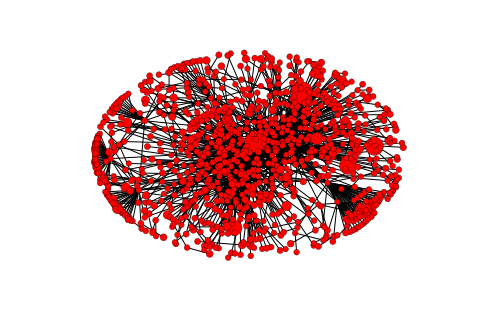

In [9]:
# Code for 8-1) and 8-2)
community.detectCommunities(G, algo=community.PLM(G,True))
communities = _
viztasks.drawCommunityGraph(G, communities)

### Further Applications of Clustering/Community Detection
Subgraphs that are internally dense and externally sparse, i.e. communities or clusters, are not only useful in social or other complex networks. Outside network analysis, there are numerous applications as well. As an example, consider image segmentation. This fundamental step in image processing refers to the identification and separation of image regions. Typically, this is done to separate different objects in the image from each other and to simplify the image before applying other image processing tools.

Our student Marcel Radermacher has tested our community detection techniques for the purpose of image segmentation. If you still have time, I encourage you to take a look at his results: http://nbviewer.ipython.org/urls/networkit.iti.kit.edu/data/uploads/projects/graph-based-segmentation.ipynb.

On the website the code cannot be used interactively. If you are interested, you can pull it from https://algohub.iti.kit.edu/parco/NetworKit/NetworKit-ImageSegmentation, though.

## Concluding Remarks and Further Reading
NetworKit is steadily growing and already offers more than can be treated within this tutorial. Take a look at the project website and our papers for more information. We would be very happy if you decided to use NetworKit on a regular basis, be it as a user or as a developer. Since NetworKit is an open-source project, feedback and contributions are welcome (and have already happened in the past). The email list `networkit@ira.uni-karlsruhe.de` is the place for general discussion and questions. Also feel free to contact the authors with questions on how NetworKit can be applied in your research.

-- Henning Meyerhenke

### Acknowledgements
This tutorial is partially based on the NetworKit user guide, which has been written to a large extent by Christian L. Staudt. Christian also contributed several ideas, questions and answers (including code) to this tutorial. Thank you very much!

Many other people have contributed to NetworKit and its documentation since its first release as Python/C++ hybrid in November 2013 (version 2.0). NetworKit would not be what it is today without their help! A full list of contributors can be found on the project website: https://networkit.iti.kit.edu/credits/.